In [1]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

import statsmodels.formula.api as smf

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Load the data

In [2]:
df = pd.read_csv('housing.csv', dtype={'ocean_proximity': 'category'})

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  category
dtypes: category(1), float64(9)
memory usage: 1.4 MB


In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Summary statistics

In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Missing values

In [6]:
total_bedrooms_median = df['total_bedrooms'].median()
df['total_bedrooms'].fillna(total_bedrooms_median, inplace=True)
df.describe()

C:\Users\kbeni\AppData\Local\Temp\ipykernel_11176\2393690427.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(total_bedrooms_median, inplace=True)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Categorical variables

In [7]:
ocean_proximity_counts = df['ocean_proximity'].value_counts()
ocean_proximity_counts

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [8]:
proximity_mapping = {
    'ISLAND': 1,
    'NEAR OCEAN': 2,
    'NEAR BAY': 3,
    '<1H OCEAN': 4,
    'INLAND': 5
}
df['ocean_proximity_ordinal'] = df['ocean_proximity'].map(proximity_mapping)
df[['ocean_proximity', 'ocean_proximity_ordinal']].head()
df = df.drop('ocean_proximity', axis=1)
df['ocean_proximity_ordinal'] = df['ocean_proximity_ordinal'].astype(float)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   longitude                20640 non-null  float64
 1   latitude                 20640 non-null  float64
 2   housing_median_age       20640 non-null  float64
 3   total_rooms              20640 non-null  float64
 4   total_bedrooms           20640 non-null  float64
 5   population               20640 non-null  float64
 6   households               20640 non-null  float64
 7   median_income            20640 non-null  float64
 8   median_house_value       20640 non-null  float64
 9   ocean_proximity_ordinal  20640 non-null  float64
dtypes: float64(10)
memory usage: 1.6 MB


## Data distribution

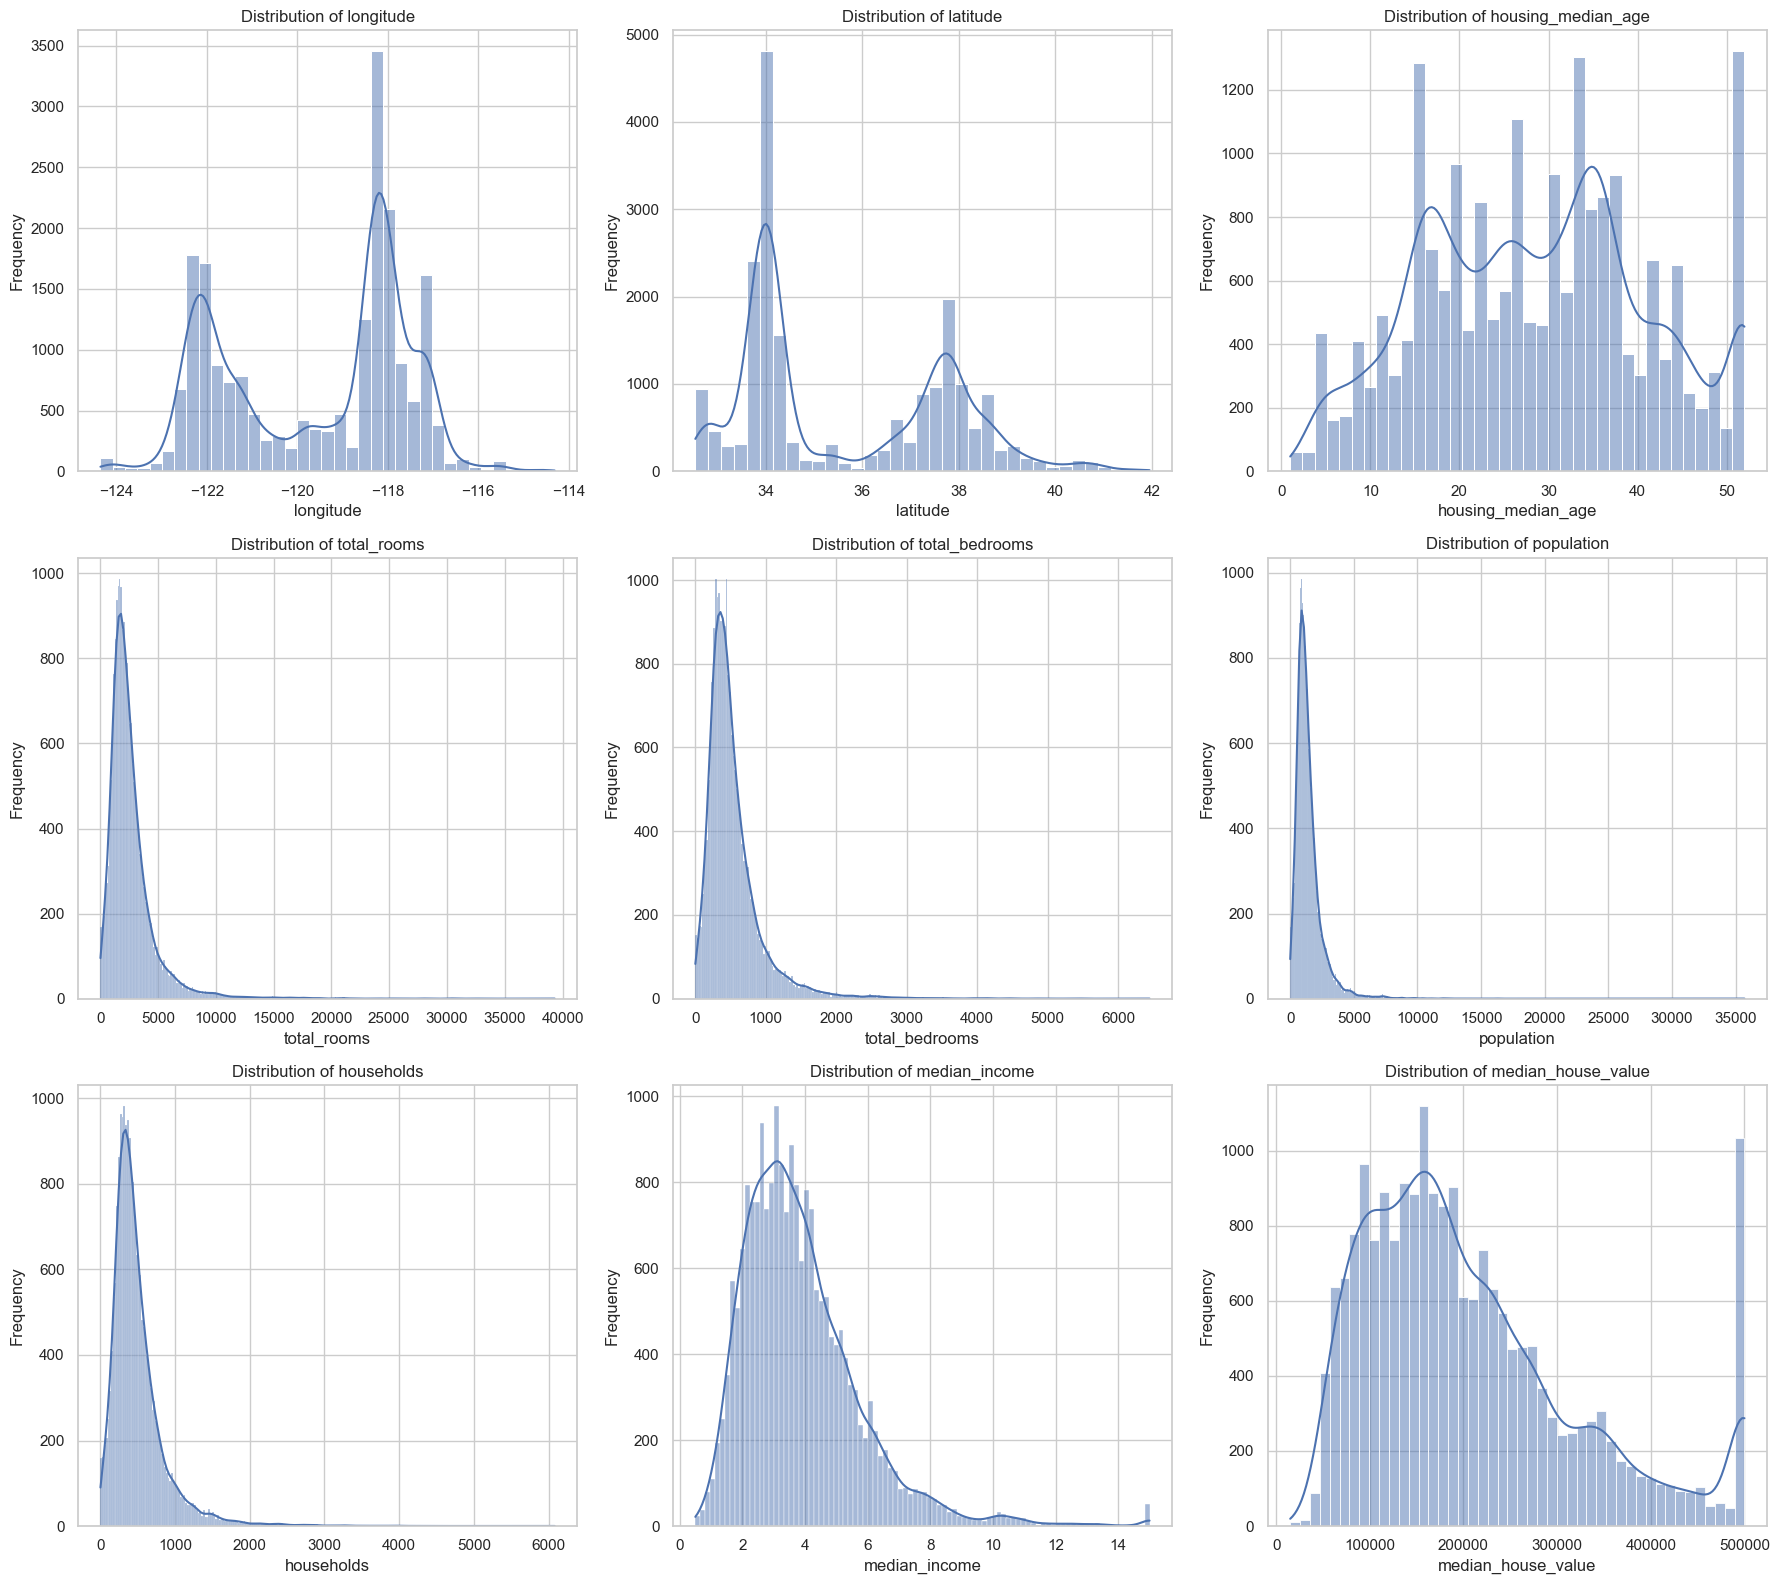

In [10]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 3, figsize=(18, 16))

num_cols = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
            'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
for ax, col in zip(axes.flat, num_cols):
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_ylabel('Frequency')

plt.tight_layout()

In [11]:
log_columns = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
for col in log_columns:
    df[f'log_{col}'] = np.log(df[col] + 1)
    df = df.drop(col, axis=1)

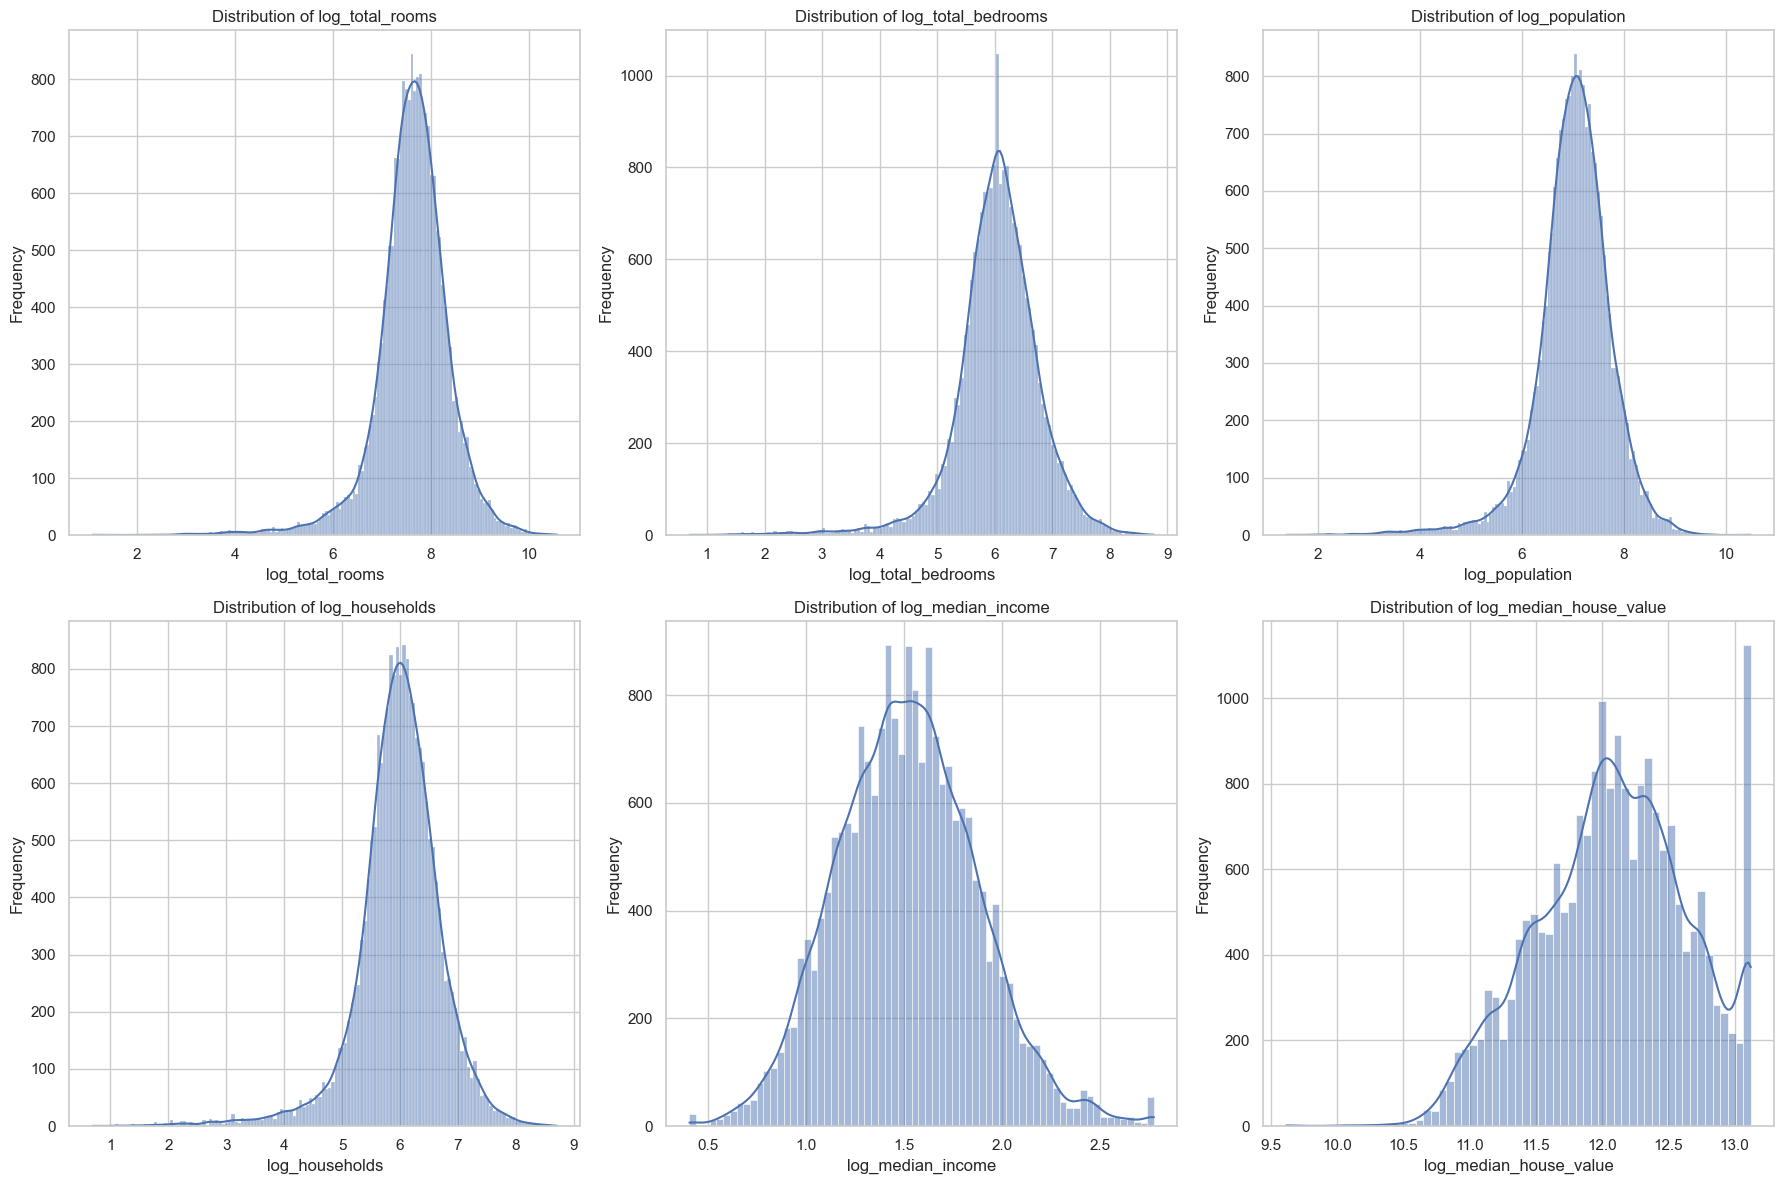

In [12]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

num_cols = ['log_total_rooms', 'log_total_bedrooms', 'log_population', 'log_households', 'log_median_income', 'log_median_house_value']
for ax, col in zip(axes.flat, num_cols):
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_ylabel('Frequency')

plt.tight_layout()

In [13]:
df.describe()

,longitude,latitude,housing_median_age,ocean_proximity_ordinal,log_total_rooms,log_total_bedrooms,log_population,log_households,log_median_income,log_median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,3.948159,7.629377,6.054938,7.025503,5.984702,1.516995,12.084891
std,2.003532,2.135952,12.585558,0.971081,0.749991,0.723078,0.736238,0.726740,0.358677,0.569131
min,-124.350000,32.540000,1.000000,1.000000,1.098612,0.693147,1.386294,0.693147,0.405398,9.615805
25%,-121.800000,33.930000,18.000000,4.000000,7.278456,5.697093,6.669498,5.638355,1.270715,11.691916
50%,-118.490000,34.260000,29.000000,4.000000,7.662938,6.077642,7.062192,6.016157,1.511781,12.099050
75%,-118.010000,37.710000,37.000000,5.000000,8.054840,6.468087,7.453562,6.406880,1.748025,12.486451
max,-114.310000,41.950000,52.000000,5.000000,10.579514,8.771215,10.482430,8.713253,2.772595,13.122367


## Geographical plot

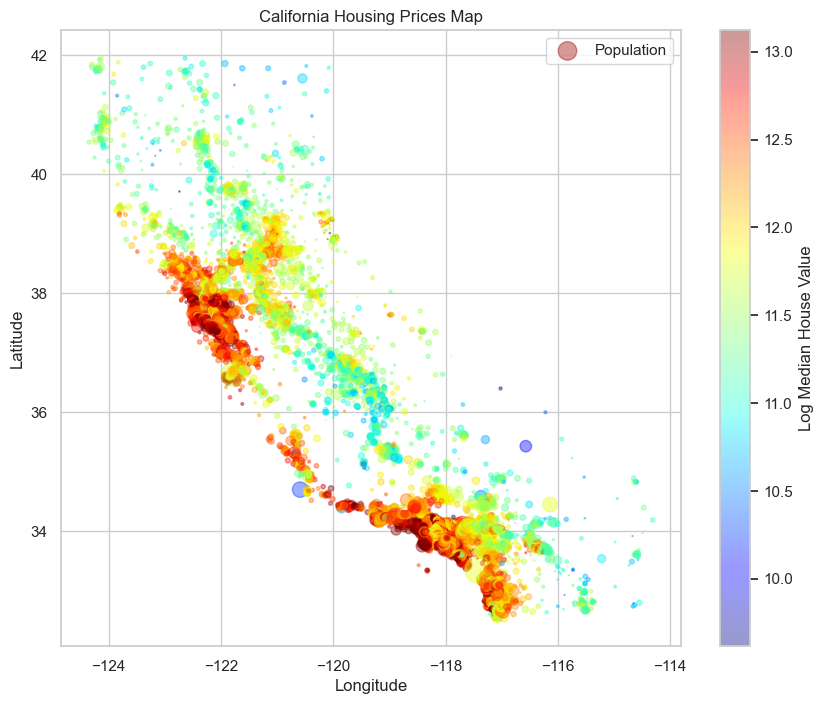

In [14]:
plt.figure(figsize=(10, 8))

plt.scatter(df['longitude'], df['latitude'], alpha=0.4,
            s=np.exp(df['log_population'])/100,  # size of points proportional to population
            label='Population',
            c=df['log_median_house_value'], cmap=plt.get_cmap("jet"), marker='o')
plt.colorbar(label='Log Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('California Housing Prices Map')
plt.legend()

## Correlation analysis

In [15]:
correlation = df.corr()
correlation

,longitude,latitude,housing_median_age,ocean_proximity_ordinal,log_total_rooms,log_total_bedrooms,log_population,log_households,log_median_income,log_median_house_value
longitude,1.000000,-0.924664,-0.108197,0.094976,0.029337,0.060528,0.109029,0.055261,-0.015596,-0.023209
latitude,-0.924664,1.000000,0.011173,0.164030,-0.032319,-0.067937,-0.136460,-0.087937,-0.085641,-0.192596
housing_median_age,-0.108197,0.011173,1.000000,-0.211697,-0.315216,-0.270861,-0.244264,-0.242896,-0.138308,0.076007
ocean_proximity_ordinal,0.094976,0.164030,-0.211697,1.000000,-0.002898,-0.027225,-0.004653,-0.053438,-0.157244,-0.425299
log_total_rooms,0.029337,-0.032319,-0.315216,-0.002898,1.000000,0.941436,0.864776,0.931710,0.252241,0.186376
log_total_bedrooms,0.060528,-0.067937,-0.270861,-0.027225,0.941436,1.000000,0.893142,0.969849,0.014319,0.087238
log_population,0.109029,-0.136460,-0.244264,-0.004653,0.864776,0.893142,1.000000,0.932306,0.031763,0.026385
log_households,0.055261,-0.087937,-0.242896,-0.053438,0.931710,0.969849,0.932306,1.000000,0.046914,0.113635
log_median_income,-0.015596,-0.085641,-0.138308,-0.157244,0.252241,0.014319,0.031763,0.046914,1.000000,0.681271
log_median_house_value,-0.023209,-0.192596,0.076007,-0.425299,0.186376,0.087238,0.026385,0.113635,0.681271,1.000000


Text(0.5, 1.0, 'Correlation Matrix Heatmap')

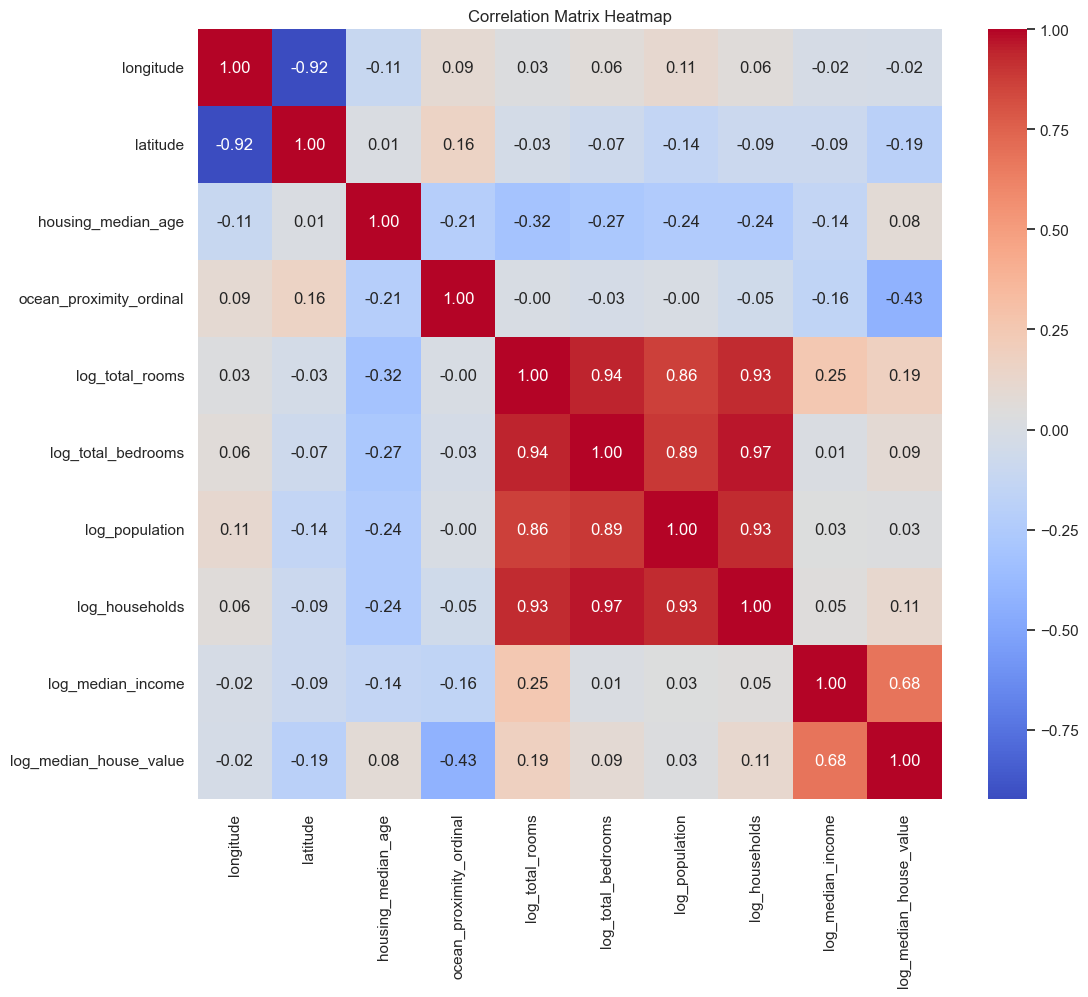

In [16]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap')

## PCA

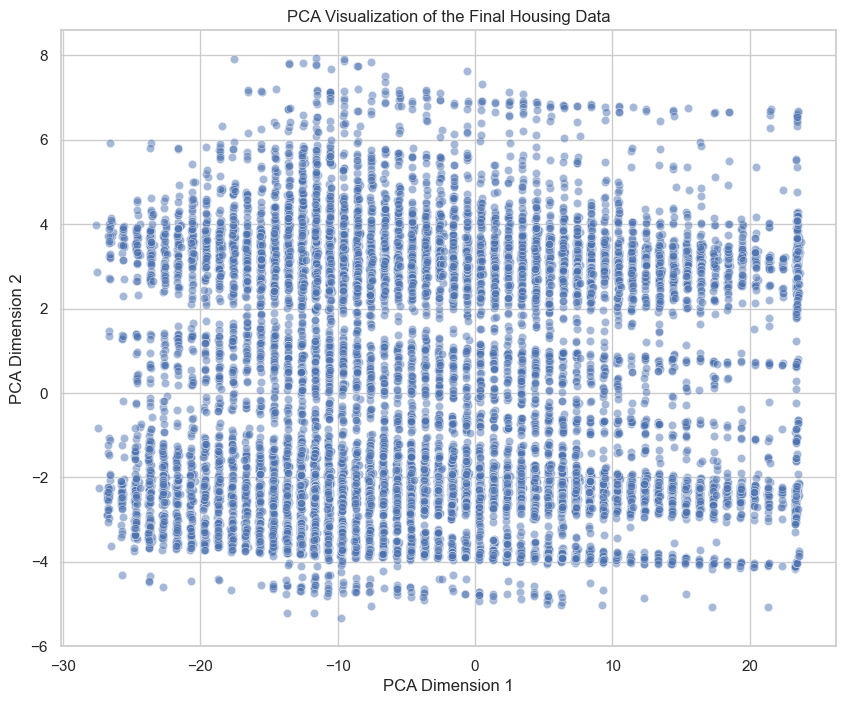

array([0.93530301, 0.04860016])

In [17]:
pca_final = PCA(n_components=2)

numeric_data_final = df.drop(['ocean_proximity_ordinal'], axis=1)
pca_final_results = pca_final.fit_transform(numeric_data_final)
pca_final_df = pd.DataFrame(pca_final_results, columns=['PCA-1', 'PCA-2'])

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA-1', y='PCA-2', data=pca_final_df, alpha=0.5)
plt.title('PCA Visualization of the Final Housing Data')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.show()

pca_final.explained_variance_ratio_

## PCA loadings

In [18]:
pca1_loadings = pca_final.components_[0]
pca2_loadings = pca_final.components_[1]

pca_loadings_dict = {
    'Feature': numeric_data_final.columns,
    'PCA-1 Loadings': pca1_loadings,
    'PCA-2 Loadings': pca2_loadings
}
pca_loadings_df = pd.DataFrame(pca_loadings_dict)
pca_loadings_df

,Feature,PCA-1 Loadings,PCA-2 Loadings
0,longitude,-0.017735,-0.678382
1,latitude,0.002450,0.733008
2,housing_median_age,0.999316,-0.014953
3,log_total_rooms,-0.018959,-0.007769
4,log_total_bedrooms,-0.015743,-0.016840
5,log_population,-0.014480,-0.033032
6,log_households,-0.014212,-0.019635
7,log_median_income,-0.003944,-0.004333
8,log_median_house_value,0.003415,-0.020829


## PCA with scaling

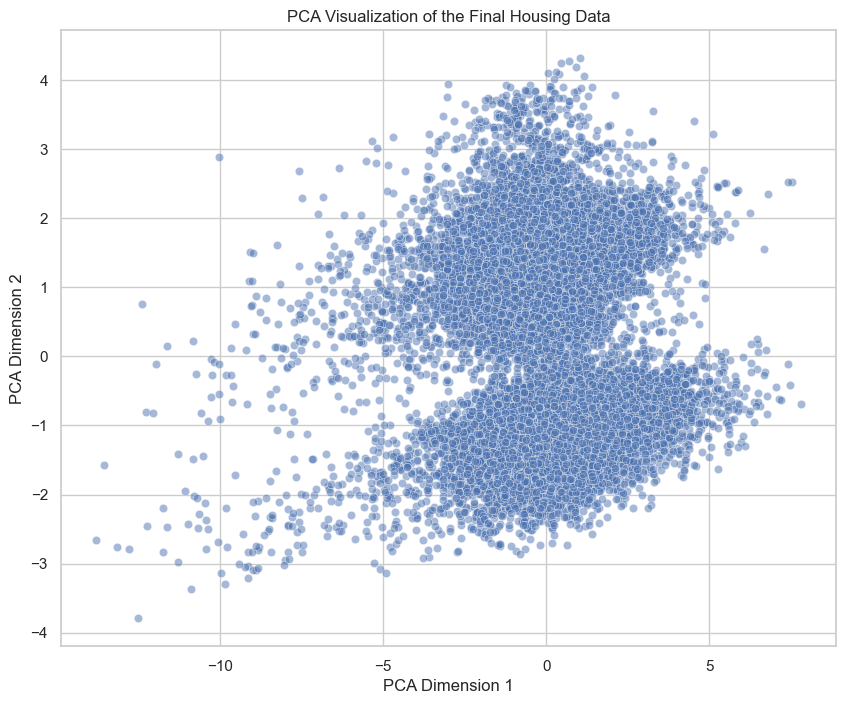

array([0.43641583, 0.21487803])

In [19]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(['ocean_proximity_ordinal'], axis=1))
pca_final_results = pca_final.fit_transform(scaled_features)
pca_final_df = pd.DataFrame(pca_final_results, columns=['PCA-1', 'PCA-2'])

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA-1', y='PCA-2', data=pca_final_df, alpha=0.5)
plt.title('PCA Visualization of the Final Housing Data')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.show()

pca_final.explained_variance_ratio_

In [20]:
pca1_loadings = pca_final.components_[0]
pca2_loadings = pca_final.components_[1]

pca_loadings_dict = {
    'Feature': numeric_data_final.columns,
    'PCA-1 Loadings': pca1_loadings,
    'PCA-2 Loadings': pca2_loadings
}
pca_loadings_df = pd.DataFrame(pca_loadings_dict)
pca_loadings_df

,Feature,PCA-1 Loadings,PCA-2 Loadings
0,longitude,0.074566,-0.648933
1,latitude,-0.086177,0.682928
2,housing_median_age,-0.182511,0.006111
3,log_total_rooms,0.486876,0.077023
4,log_total_bedrooms,0.486705,0.092190
5,log_population,0.472313,0.050327
6,log_households,0.490620,0.081094
7,log_median_income,0.088963,-0.191458
8,log_median_house_value,0.089836,-0.228607


## TSNE

Text(0, 0.5, 't-SNE Dimension 2')

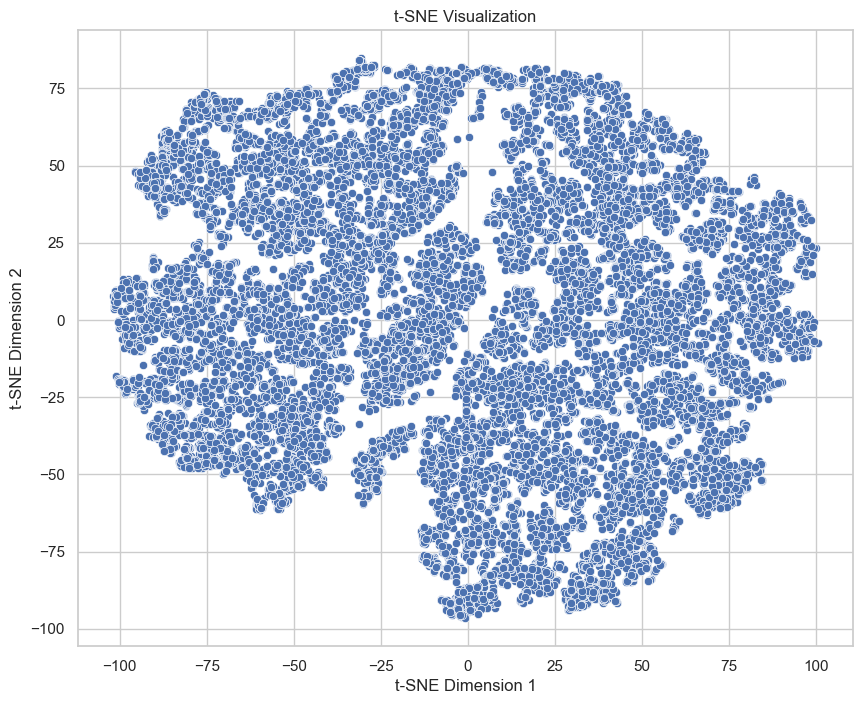

In [21]:
# Initialize and fit TSNE
tsne = TSNE(n_components=2, random_state=42, learning_rate='auto', init='random')
tsne_results = tsne.fit_transform(scaled_features)

# Create a DataFrame for the TSNE results for easy plotting
tsne_df = pd.DataFrame(tsne_results, columns=['TSNE-1', 'TSNE-2'])

# Plot the TSNE results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='TSNE-1', y='TSNE-2', data=tsne_df)
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

## Clustering

### Optimal K

Text(0.5, 1.0, 'Elbow Method For Optimal k')

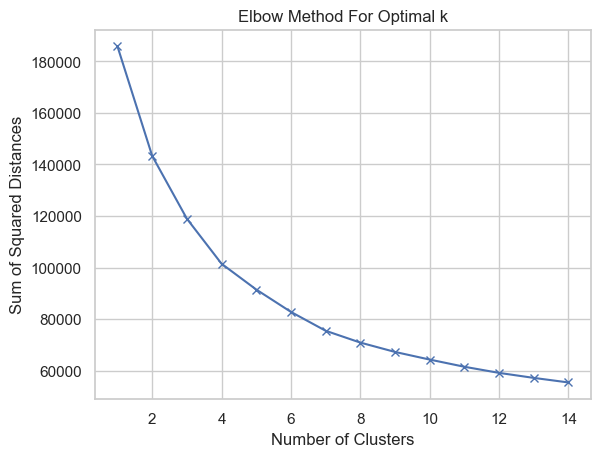

In [22]:
ssd = []
range_n_clusters = list(range(1, 15))
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(scaled_features)
    ssd.append(kmeans.inertia_)

plt.plot(range_n_clusters, ssd, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')

### Compute clusters

In [23]:
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(scaled_features)

KMeans(random_state=42)

<Axes: xlabel='longitude', ylabel='latitude'>

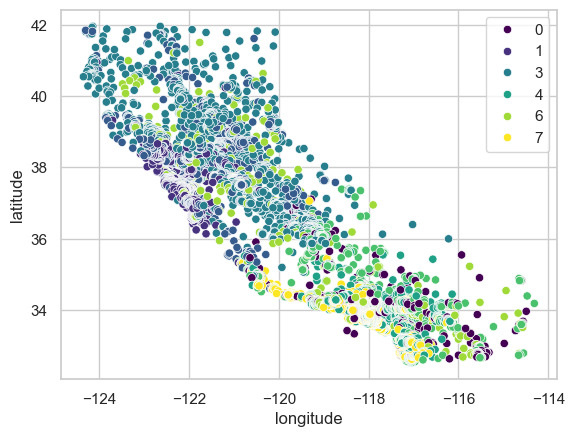

In [24]:
sns.scatterplot(data=df, x='longitude', y='latitude', hue=kmeans.labels_, palette='viridis')

### Visualize with PCA

Text(0.5, 1.0, 'Cluster visualization')

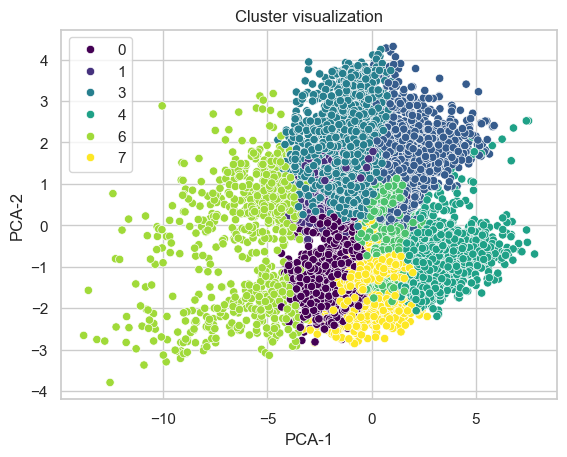

In [25]:
sns.scatterplot(x='PCA-1', y='PCA-2', hue=kmeans.labels_, data=pca_final_df, palette='viridis')
plt.title('Cluster visualization')

### Visualize with TSNE

Text(0.5, 1.0, 'Cluster visualization')

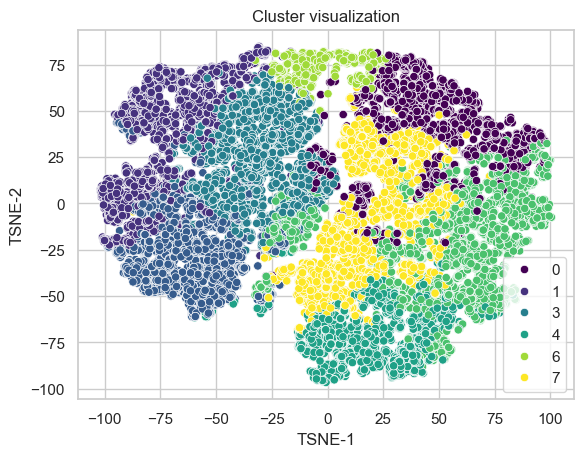

In [26]:
sns.scatterplot(x='TSNE-1', y='TSNE-2', data=tsne_df, hue=kmeans.labels_, palette='viridis')
plt.title('Cluster visualization')

## Regression & Classification

### Regression

In [27]:
formula = 'log_median_house_value ~ ' + ' + '.join([col for col in df.columns if col not in ['log_median_house_value']])
model = smf.ols(formula, data=df).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     log_median_house_value   R-squared:                       0.683
Model:                                OLS   Adj. R-squared:                  0.683
Method:                     Least Squares   F-statistic:                     4939.
Date:                    Sun, 23 Jun 2024   Prob (F-statistic):               0.00
Time:                            23:22:54   Log-Likelihood:                -5795.7
No. Observations:                   20640   AIC:                         1.161e+04
Df Residuals:                       20630   BIC:                         1.169e+04
Df Model:                               9                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

### Classification

In [28]:
median_log_value = df['log_median_house_value'].median()
df['target'] = np.where(df['log_median_house_value'] >= median_log_value, 1, 0)

In [29]:
formula = 'target ~ ' + ' + '.join([col for col in df.columns if col not in ['log_median_house_value', 'target']])
model = smf.logit(formula, data=df).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.367375
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                20640
Model:                          Logit   Df Residuals:                    20630
Method:                           MLE   Df Model:                            9
Date:                Sun, 23 Jun 2024   Pseudo R-squ.:                  0.4700
Time:                        23:22:54   Log-Likelihood:                -7582.6
converged:                       True   LL-Null:                       -14307.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                -153.3740      4.516    -33.966      0.000    -162.224   

## Forward selection

In [30]:
X = df.drop(columns=['log_median_house_value', 'ocean_proximity_ordinal', 'target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

selected_features = []
current_score = 0.0

for _ in range(len(X_train_scaled_df.columns)):
    best_feature = None
    best_score = current_score
    
    for feature in X_train_scaled_df.columns:
        if feature not in selected_features:
            trial_features = selected_features + [feature]
            X_train_trial = X_train_scaled_df[trial_features]
            X_test_trial = X_test_scaled_df[trial_features]
            
            model = LogisticRegression(max_iter=1000)
            model.fit(X_train_trial, y_train)
            
            y_pred_prob = model.predict_proba(X_test_trial)[:, 1]
            score = roc_auc_score(y_test, y_pred_prob)
            
            if score > best_score:
                best_score = score
                best_feature = feature
    
    if best_feature is None:
        break
    
    selected_features.append(best_feature)
    current_score = best_score

selected_features, current_score

(['log_median_income',
  'housing_median_age',
  'log_total_bedrooms',
  'log_total_rooms',
  'log_population',
  'log_households',
  'latitude',
  'longitude'],
 np.float64(0.9147619806786673))